# Temporal Difference Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from herringbone import MDP, Sarsa, QLearning

All initialization tests passed.
imported herringbone without any errors :)


In [2]:
# sns.set(style="ticks", font="Linux Libertine O")

state_config = "herringbone/env_core/config/state_config.json"
map_ = "herringbone/env_core/maps/danger_holes.csv"
action_config = "herringbone/env_core/config/action_config.json"

seed = 42
epsilon = 0.1

CPU times: user 8.58 s, sys: 9.94 ms, total: 8.59 s
Wall time: 8.59 s


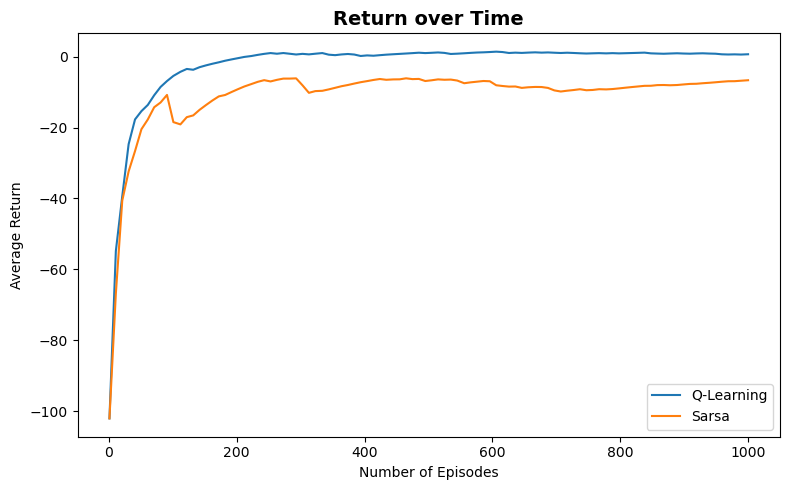

In [3]:
%%time

def compute_return(algorithm):
    num_episode = np.linspace(1, 1_000, 100, dtype=int)
    return_avg = []

    for n in num_episode:
        model = algorithm(
            num_episodes=n,
            mdp=MDP(
                state_config=state_config,
                map=map_,
                action_config=action_config,
                seed=seed,
                gamma=1  # G_t
            ),
            epsilon=epsilon,
        )
        model.run()
        return_avg.append(model.reward_total)

    return num_episode, return_avg / num_episode

 
plt.figure(figsize=(8, 5))

plt.plot(*compute_return(QLearning), label='Q-Learning')
plt.plot(*compute_return(Sarsa), label='Sarsa')

plt.xlabel('Number of Episodes')
plt.ylabel('Average Return')
plt.title('Return over Time', fontsize=14, weight='bold')
plt.legend()

plt.tight_layout()

CPU times: user 17 s, sys: 170 ms, total: 17.2 s
Wall time: 17.2 s


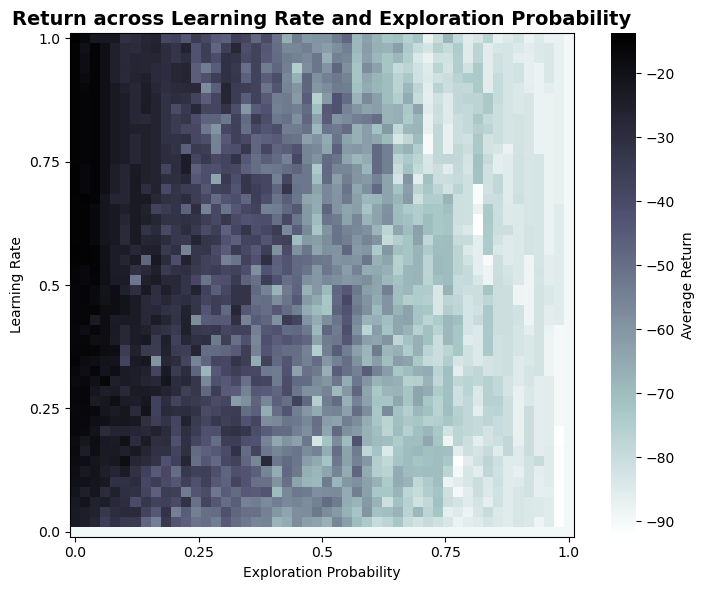

In [4]:
%%time

def compute_return(algorithm):
    num_episodes = 50
    alpha = np.linspace(0, 1, 50)
    epsilon = np.linspace(0, 1, 50)
    return_avg = np.zeros((len(alpha), len(epsilon)))

    for i, a in enumerate(alpha):
        for j, e in enumerate(epsilon):
            model = algorithm(
                num_episodes=num_episodes,
                mdp=MDP(
                    state_config=state_config,
                    map=map_,
                    action_config=action_config,
                    seed=seed,
                    gamma=1,  # G_t
                ),
                alpha=a,
                epsilon=e,
            )
            model.run()
            return_avg[i, j] = model.reward_total / num_episodes

    return alpha, epsilon, return_avg


alpha, epsilon, return_avg = compute_return(Sarsa)

fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.imshow(return_avg, cmap='bone_r', origin='lower')
fig.colorbar(cax, ax=ax, label='Average Return').outline.set_visible(False)

ax.set_xticks(np.linspace(0, len(epsilon) - 1, 5))
ax.set_xticklabels(np.linspace(0, 1, 5).round(2))
ax.set_yticks(np.linspace(0, len(alpha) - 1, 5))
ax.set_yticklabels(np.linspace(0, 1, 5).round(2))

ax.set_xlabel('Exploration Probability')
ax.set_ylabel('Learning Rate')
ax.set_title('Return across Learning Rate and Exploration Probability', fontsize=14, weight='bold')

plt.tight_layout()